In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import  numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('hiring.csv')

In [6]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


## for filling experience column install num2words and word2number  lib

In [7]:
# pip install num2words

In [8]:
# pip install word2number


In [9]:
# from num2words import num2words

# number = 1234
# text_representation = num2words(number)
# print(text_representation)


In [10]:
# from word2number import w2n

# text = "one thousand two hundred thirty-four"
# number = w2n.word_to_num(text)
# print(number)


In [11]:
from num2words import num2words
from word2number import w2n


In [12]:
num2words(23)

'twenty-three'

In [13]:
w2n.word_to_num('seventy two')

72

In [14]:
# temp=w2n.word_to_num(str(df['experience']))
# temp

In [15]:
df.fillna(0, inplace=True)


In [16]:
temp=[w2n.word_to_num(str(i)) for i in df['experience']]
temp

[0, 0, 5, 2, 7, 3, 10, 11]

In [17]:
# x=num2words(int(pd.DataFrame(temp).median()))
x=int(pd.DataFrame(temp).median())

x

4

In [18]:
# temp=pd.DataFrame(temp).replace(0,x,inplace=True)
temp=list(map(lambda y:x if y==0 else y,temp))
print(temp)

[4, 4, 5, 2, 7, 3, 10, 11]


In [19]:
# df['experience'].replace(0, 'four', inplace=True)
df['experience']=temp


In [20]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,4,8.0,9,50000
1,4,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [21]:
X=df.drop('salary($)',axis='columns')
y=df['salary($)']


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred=reg.predict(X_test)

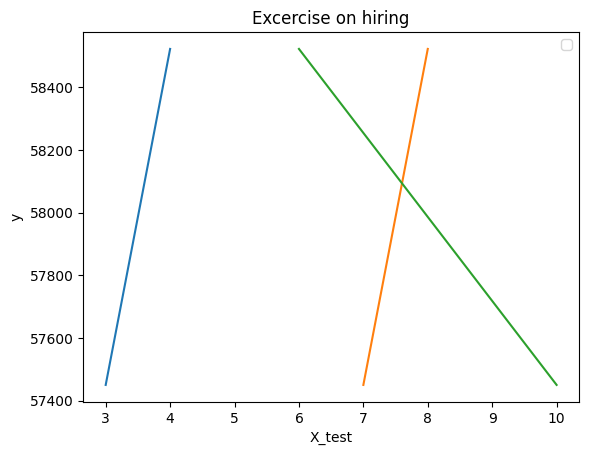

In [25]:
%matplotlib inline

plt.plot(X_test,y_pred)
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Excercise on hiring')
plt.legend()
plt.show()

In [26]:
y_pred

array([58522.87799637, 57450.59464266])

## Exercise
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

### 2 yr experience, 9 test score, 6 interview score

### 12 yr experience, 10 test score, 10 interview score

### Answer
#### 53713.86 and 93747.79

In [27]:
reg.predict([[2,9,6]])

array([53415.32362639])

In [28]:
reg.predict([[12,10,10]])

array([87638.65733022])

In [29]:
reg1=LinearRegression()
reg1.fit(df.drop('salary($)',axis='columns'),df['salary($)'])

LinearRegression()

In [30]:
reg1.predict([[2,9,6]])

array([44870.94712133])

In [31]:
reg1.predict([[12,10,10]])

array([95249.33456291])